In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
import sys
from scipy import interpolate
from glob import glob
from scipy.stats import gaussian_kde

In [2]:
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import compjk, safe_mkdir

In [4]:
root_data_dir = join(root_dir, 'Data')
spectral_dir = join(root_data_dir, 'Spectral-Class-Cluster')
spectral_files = glob(join(spectral_dir, '*.hdf5'))
spectral_files.sort()
spectral_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Proje

In [5]:
name = "Effective-Completeness"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Completeness already exist. Good to go!


# testing

/home2/s20321005/Thesis-Project/utils/completeness.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


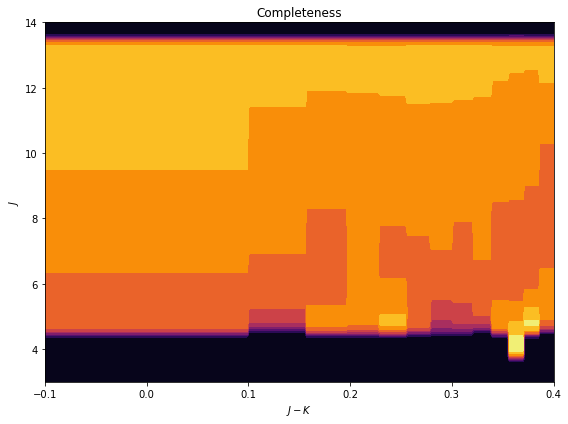

In [6]:
j = np.linspace(3, 14, 300)
jk = np.linspace(-0.1, 0.4, 300)
K, J = np.meshgrid(jk, j)

comp = np.empty_like(K)
for i, (j, jk) in enumerate(zip(J, K)):
    comp[i] = compjk(j, jk)

fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(K, J, comp, levels=np.linspace(0, 1, 11), cmap='inferno')
ax.set_xlabel(r'$J-K$')
ax.set_ylabel(r'$J$')
ax.set_title('Completeness')
fig.tight_layout()

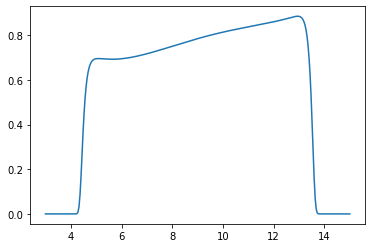

In [7]:
J = np.linspace(3, 15, 300)
JK = np.repeat(0.01, len(J))

comp = compjk(J, JK)

plt.plot(J, comp)


# load clean data

ex. first file

In [11]:
index = 0
gaia = vaex.open(spectral_files[index])
gaia = gaia.filter("abs(z) > 50").filter("abs(z) < 200")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,TD_D,TD
0,0.01692606345950085,0.3891393605162341,7.978000164031982,7.916999816894531,AAA,2847236045035991808,7.534960746765137,0.31428973130157245,0.028740057721734047,-7.528403412132262,0.035291653126478195,5.414626649593402,0.03218960762023926,8.257993698120117,8.308849334716797,8.131924629211426,1606.518310546875,3663.614990234375,1.0435644388198853,1.1647926568984985,-1.2447639901461083,-0.6851463533673376,185.764404296875,183.57119750976562,187.21949768066406,0.40720000863075256,0.4049000144004822,0.41269999742507935,nan,nan,nan,A,--,-1.9623053073883057,gaia,0.8112114071846008,0.8112114071846008,1.0,10111.888671875,gspphot,14.7001953125,61.91796875,0.0,4.351399898529053,gspphot,0.004600048065185547,0.0062999725341796875,0.0,nan,--,nan,nan,nan,0.04969999939203262,gspphot,0.06459999922662973,0.016599997878074646,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.06100034713745117,1.6458427462058371,184.68494038736586,-116.86610814118873,143.00643333017175,-1.4773945887055326,-7.388703621087389,0.02914644273095347,0.03495678152203822,-6.468120044174079,-1.2933209995171295,-0.049143105132327135,-0.026648281766649008,-3.766716399021818,0.8112114071846008,0.5147320000869019,-5.61240292518195,0.6289117267272132,-0.5723895823176695,0.20300791047069605,-5.730978622228241,0.5958421596550898,0.5031712031916151,2.133604850608599,0.04969999939203262,-5.730978622228241,-0.5723895823176695,3.483283600978182,4.2111148768153535e-06,3.4572592830014857e-07,2.504623606874517e-09,0.08209843198616397,0.008692775151476186,0.008692775151476186
1,0.0035158959649724967,0.5305083072141416,8.081000328063965,8.039999961853027,AAA,2873312200239661568,14.617414474487305,14.451251005288686,0.030547887086868286,-2.1977605786351746,0.020109251141548157,5.780108878698743,0.030021460726857185,8.32446002960205,8.370553970336914,8.213418960571289,1918.97314453125,3164.412841796875,1.0105706453323364,1.161336064338684,-1.2188784047472103,-0.5448464699442576,174.9145965576172,173.51480102539062,177.49130249023438,0.21850000321865082,0.21230000257492065,0.22370000183582306,nan,nan,nan,A,--,2.5488598346710205,gaia,0.5904097557067871,0.5904097557067871,1.0,9139.9169921875,gspphot,26.2587890625,21.2197265625,0.0,4.347700119018555,gspphot,0.006599903106689453,0.003699779510498047,0.0,nan,--,nan,nan,nan,0.040699999779462814,gspphot,0.01589999906718731,0.022099997848272324,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.0410003662109375,1.8906804241222384,173.0071216625813,-89.66730688490979,147.95687960341223,13.569288218458064,-5.435367919770953,0.030094421085801206,0.02078175176582556,-4.457293881549581,11.127545779028823,-0.028747124591811984,0.06284419546046725,-5.132948763366383,0.5904097557067871,0.306987584346683,-0.13035411751851234,0.5051422570554095,-10.490508510988937,0.18384391925197802,3.7132867437359187,0.47467831856972253,0.4207933504122871,2.028376745602959,0.040699999779462814,3.7132867437359187,-10.490508510988937,2.1170512366336167,5.447870662062249e-06,4.5890820890034185e-07,3.2595557963355743e-09,0.08423625254102962,0.008919132621991371,0.008919132621991371
2,0.03223216466717812,-0.20268470206166606,7.798999786376953,7.736000061035156,AAA,2421707452900946176,12.108649253845215,-4.530110252

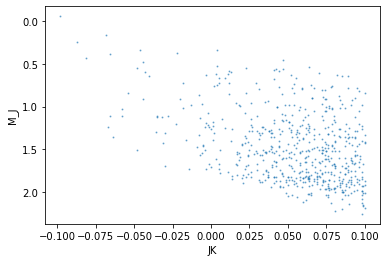

In [12]:
# plot the hr diagram of JK and M_J
gaia.viz.scatter('JK', 'M_J', s=1, alpha=0.5)
xmean = np.mean(gaia['JK'].to_numpy())
xstd = np.std(gaia['JK'].to_numpy())
xrange = xmean - 3*xstd, xmean + 3*xstd
ymean = np.mean(gaia['M_J'].to_numpy())
ystd = np.std(gaia['M_J'].to_numpy())
yrange = ymean - 3*ystd, ymean + 3*ystd
plt.gca().invert_yaxis()


/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/viz/mpl.py:146: RuntimeWarning: divide by zero encountered in log
  fgrid = f(grid)


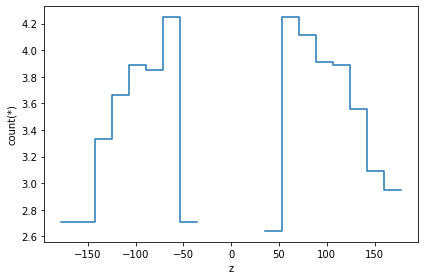

In [13]:
gaia.viz.histogram('z', shape=20, f="log")

In [153]:
# # use scipy kde to estimate the 2D kde estimate of the data
# # cut the middle plane of 30 degree
# gaia_filt = gaia.filter("abs(GLAT) > 30*3.14/180")
# gaia_filt = gaia_filt.extract()
# x = gaia_filt['JK'].to_numpy()
# y = gaia_filt['M_J'].to_numpy()
# k = gaussian_kde(np.vstack([x, y]))
# xi, yi = np.mgrid[-0.2:0.25:100j, -2:4:100j]
# zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [14]:
# use scipy kde to estimate the 2D kde estimate of the data
x = gaia['JK'].to_numpy()
y = gaia['M_J'].to_numpy()
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[xrange[0]:xrange[1]:100j, yrange[0]:yrange[1]:100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

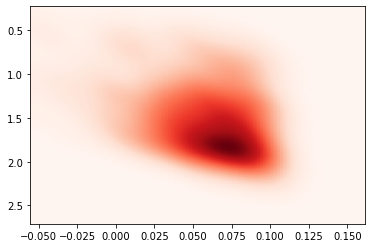

In [15]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds)
# gaia_filt.viz.scatter('JK', 'M_J', s=1, alpha=0.1)
plt.gca().invert_yaxis()
plt.show()

In [16]:
Num = 10000
jks = np.random.uniform(xrange[0], xrange[1], Num)
mjs = np.random.uniform(yrange[0], yrange[1], Num)
Djk = xrange[1] - xrange[0]
Dmj = yrange[1] - yrange[0]
# do monte carlo integration
z = k(np.vstack([jks, mjs]))*Djk*Dmj/Num
z.sum()

0.972876490246087

In [17]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

100%|██████████| 100/100 [00:27<00:00,  3.65it/s]


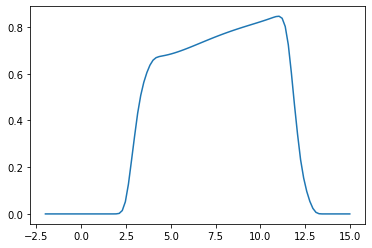

In [18]:
from tqdm import tqdm

DM = np.linspace(-2, 15, 100)

compDM = []
for dm in tqdm(DM):
    tot = k(np.vstack([jks, mjs]))*Djk*Dmj/Num*compjk(dm + mjs, jks)
    compDM.append(tot.sum())
compDM = np.array(compDM)
plt.plot(DM, compDM)
plt.show()

In [19]:
df_comp = vaex.from_arrays(DM=DM, compDM=compDM)
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,0.0
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


In [22]:
df_comp.export(join(data_dir, spectral_files[index].split("/")[-1]), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

In [23]:
spectral_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster/gaia_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Proje

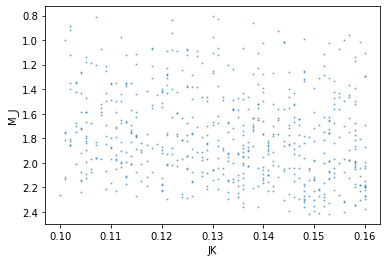

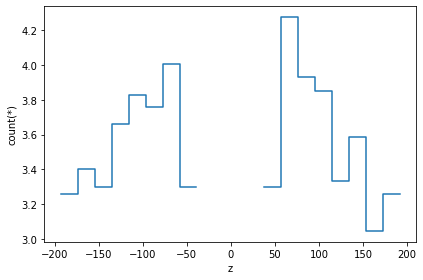

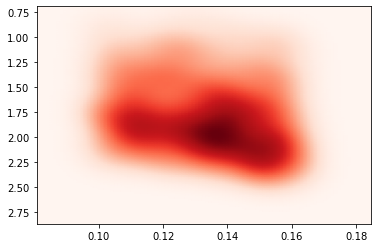

100%|██████████| 100/100 [00:27<00:00,  3.60it/s]


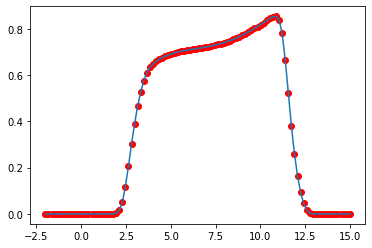

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

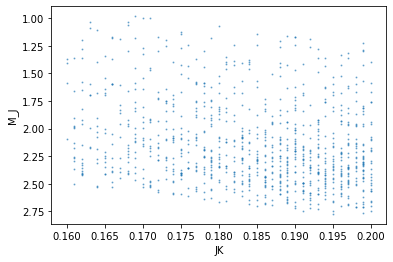

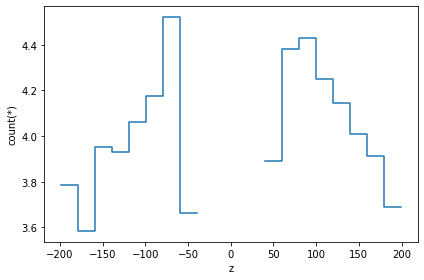

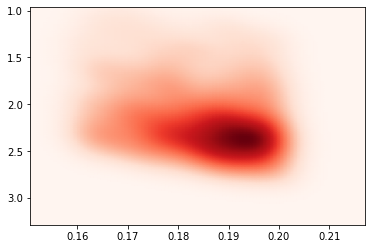

100%|██████████| 100/100 [00:33<00:00,  3.02it/s]


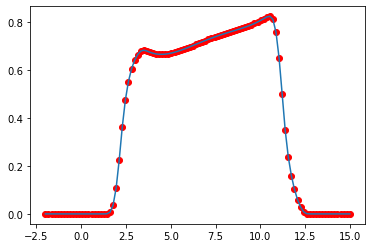

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

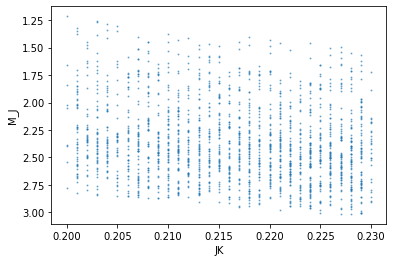

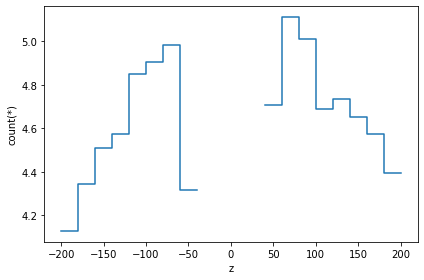

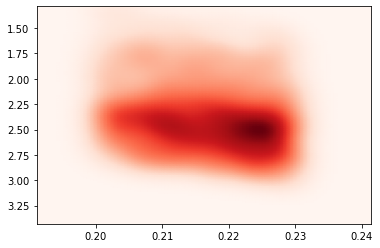

100%|██████████| 100/100 [00:51<00:00,  1.93it/s]


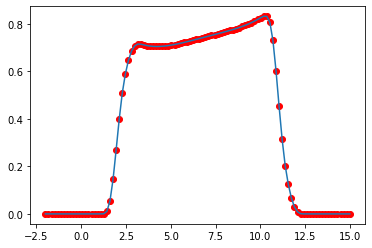

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

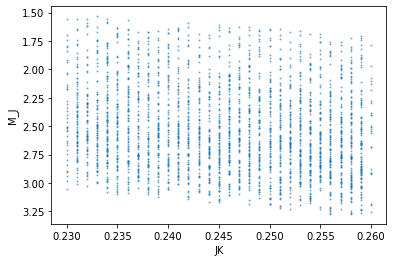

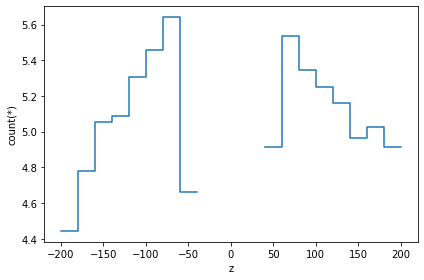

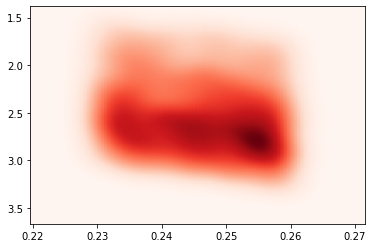

100%|██████████| 100/100 [01:13<00:00,  1.35it/s]


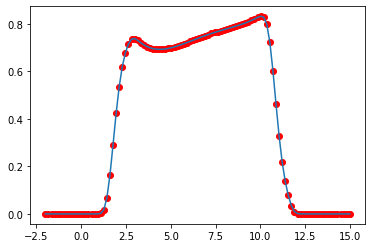

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

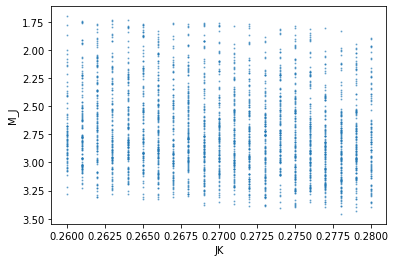

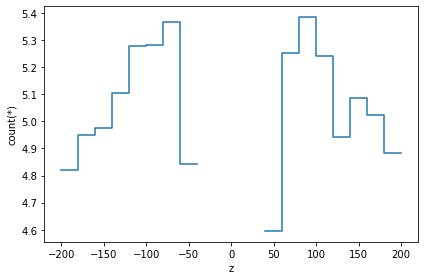

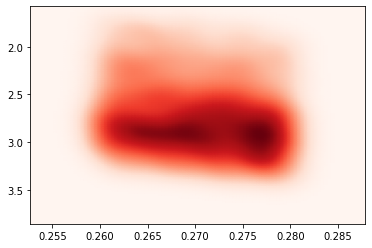

100%|██████████| 100/100 [01:10<00:00,  1.42it/s]


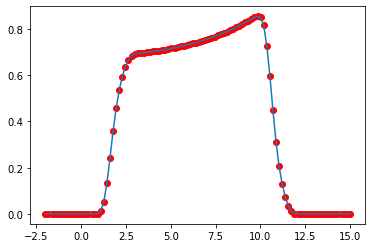

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

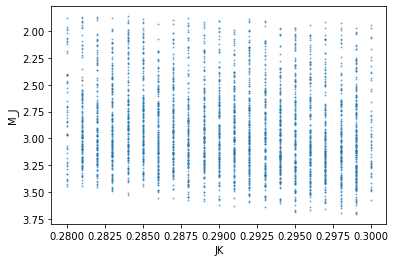

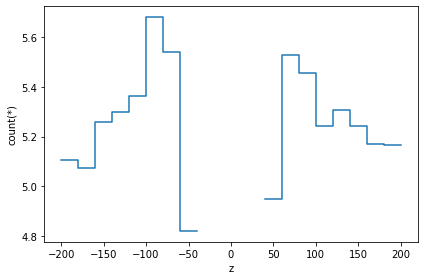

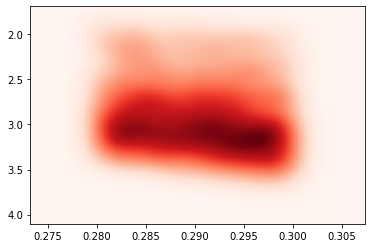

100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


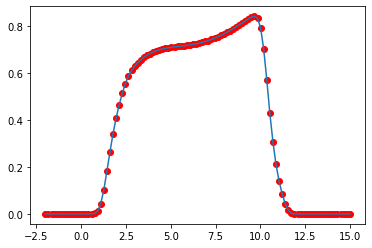

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

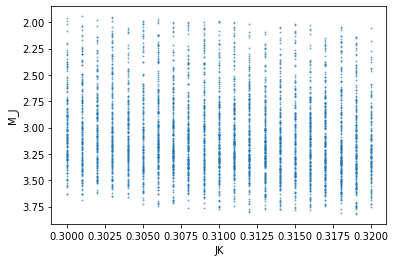

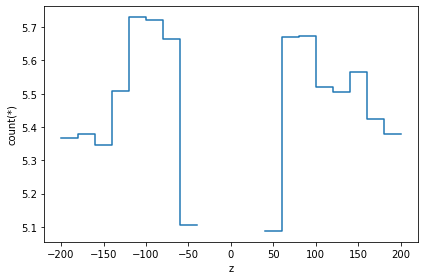

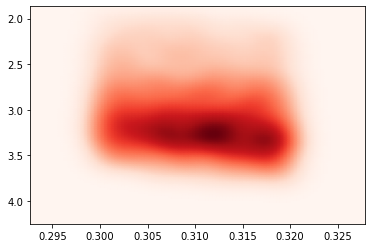

100%|██████████| 100/100 [01:42<00:00,  1.03s/it]


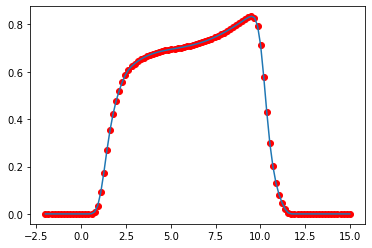

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

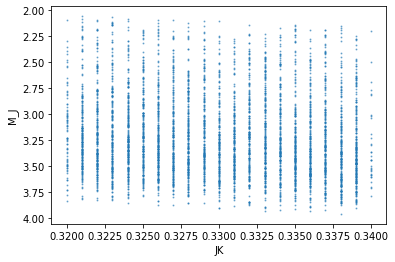

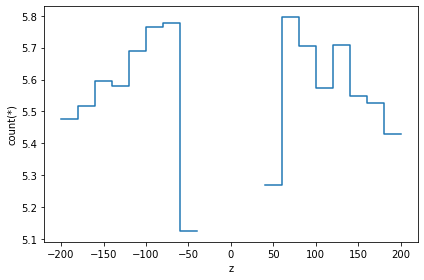

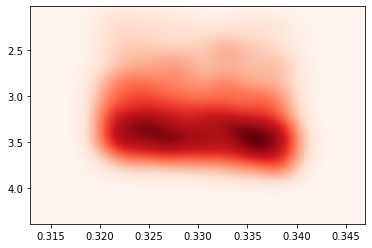

100%|██████████| 100/100 [01:52<00:00,  1.13s/it]


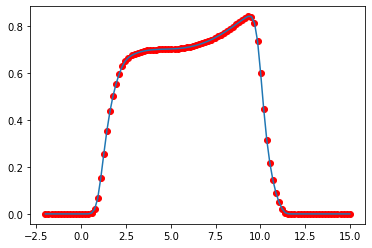

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

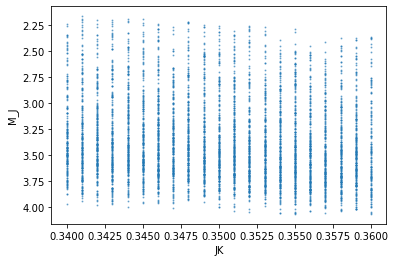

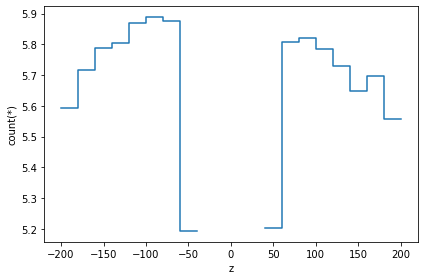

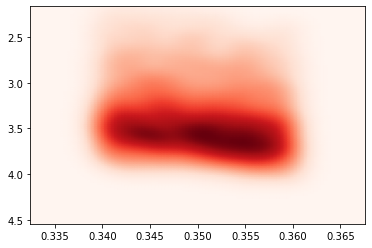

100%|██████████| 100/100 [02:05<00:00,  1.25s/it]


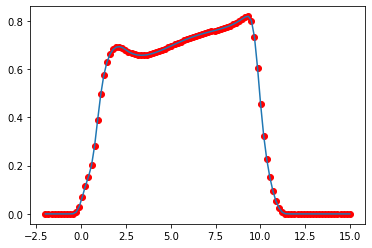

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

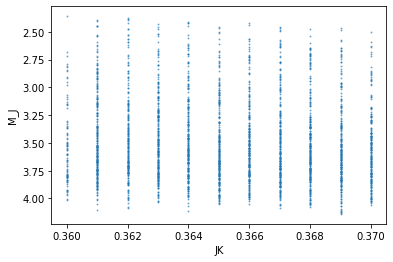

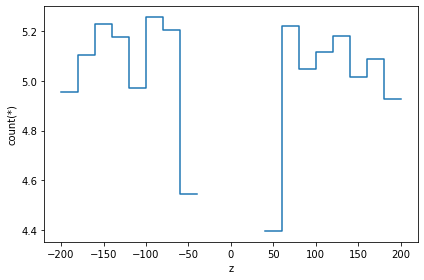

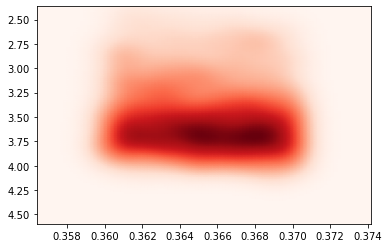

100%|██████████| 100/100 [01:09<00:00,  1.45it/s]


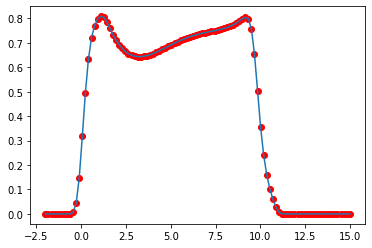

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

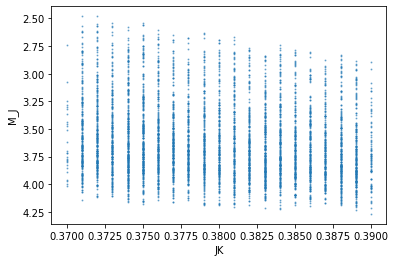

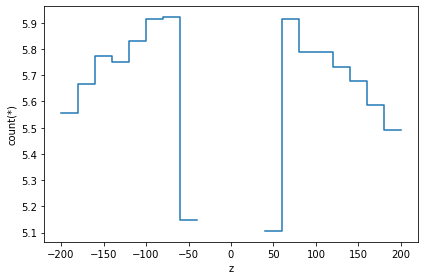

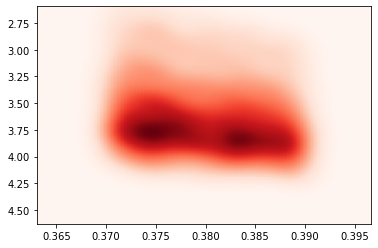

100%|██████████| 100/100 [02:04<00:00,  1.24s/it]


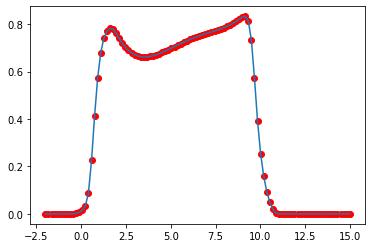

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

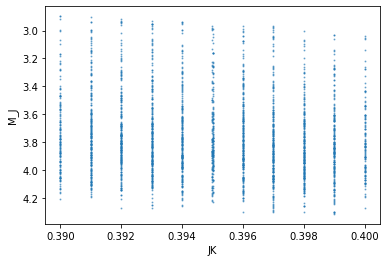

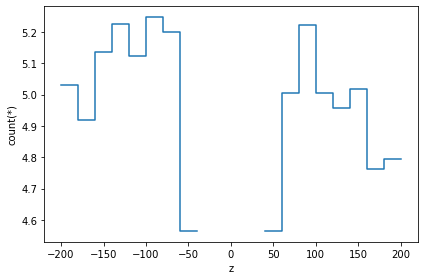

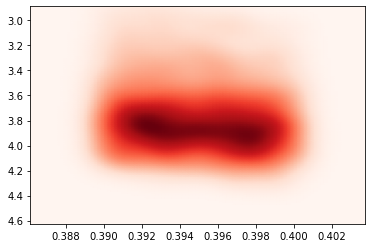

100%|██████████| 100/100 [01:06<00:00,  1.51it/s]


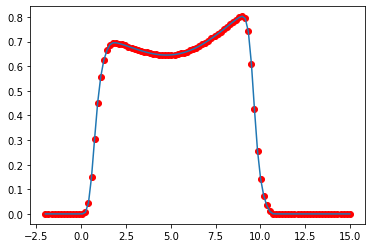

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [24]:
for file in spectral_files[1:]:
    gaia_raw = vaex.open(file)
    gaia = gaia_raw.filter("abs(z) > 50").filter("abs(z) < 200")
    gaia = gaia.extract()

    # plot the hr diagram of JK and M_J
    xmean = np.mean(gaia['JK'].to_numpy())
    xstd = np.std(gaia['JK'].to_numpy())
    xrange = xmean - 3*xstd, xmean + 3*xstd
    ymean = np.mean(gaia['M_J'].to_numpy())
    ystd = np.std(gaia['M_J'].to_numpy())
    yrange = ymean - 3*ystd, ymean + 3*ystd

    gaia.viz.scatter('JK', 'M_J', s=1, alpha=0.5)
    plt.gca().invert_yaxis()
    plt.show()

    gaia.viz.histogram('z', shape=20, f="log", show=True)

    # use scipy kde to estimate the 2D kde estimate of the data
    x = gaia['JK'].to_numpy()
    y = gaia['M_J'].to_numpy()
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[xrange[0]:xrange[1]:100j, yrange[0]:yrange[1]:100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds)
    # gaia_filt.viz.scatter('JK', 'M_J', s=1, alpha=0.1)
    plt.gca().invert_yaxis()
    plt.show()
    # calculate effective completeness, using monte carlo integration

    Num = 10000
    jks = np.random.uniform(xrange[0], xrange[1], Num)
    mjs = np.random.uniform(yrange[0], yrange[1], Num)
    Djk = xrange[1] - xrange[0]
    Dmj = yrange[1] - yrange[0]

    DM = np.linspace(-2, 15, 100)

    compDM = []
    for dm in tqdm(DM):
        tot = k(np.vstack([jks, mjs]))*Djk*Dmj/Num*compjk(dm + mjs, jks)
        compDM.append(tot.sum())
    compDM = np.array(compDM)
    plt.plot(DM, compDM)
    plt.scatter(DM, compDM, c="r")
    plt.show()

    df_comp = vaex.from_arrays(DM=DM, compDM=compDM)
    df_comp.export(join(data_dir, file.split("/")[-1]), progress=True)